<h1 style="text-align: center;">Recognition of hand gestures</h1>

This notebook is about hand digits classification through convolutional networks

<h2>Librairies Importation</h2>

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
%matplotlib inline

tf.set_random_seed(1)
np.random.seed(1)

<h2>Datasets loading</h2>

In [2]:
train_set=h5py.File("train_signs.h5","r")



classes=np.array(train_set["list_classes"][:])


train_set_x=np.array(train_set["train_set_x"][:])

train_set_y=np.array(train_set["train_set_y"][:])

train_set_y=train_set_y.reshape((1, train_set_y.shape[0]))



test_set=h5py.File("test_signs.h5","r")



test_set_x=np.array(test_set["test_set_x"][:])

test_set_y=np.array(test_set["test_set_y"][:])

test_set_y=test_set_y.reshape((1, test_set_y.shape[0]))

In [3]:
print(np.shape(train_set_x))

print(np.shape(train_set_y))

print(np.shape(test_set_x))

print(np.shape(test_set_y))

print(classes)

(1080, 64, 64, 3)
(1, 1080)
(120, 64, 64, 3)
(1, 120)
[0 1 2 3 4 5]


<h2>Data Sample</h2>

The following image shows a digit of  5


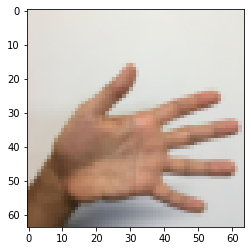

In [4]:
index=0

print("The following image shows a digit of ", np.squeeze(train_set_y[:,index]))

plt.imshow(train_set_x[index])

<h2>Input normalization and Output encoding</h2>

In [5]:
train_set_x=train_set_x/255

train_set_y=(np.eye(len(classes))[train_set_y.reshape(-1)])

print(np.shape(train_set_y))



test_set_x=test_set_x/255

test_set_y=(np.eye(len(classes))[test_set_y.reshape(-1)])

print(np.shape(test_set_y))

(1080, 6)
(120, 6)


<h2>Placeholders</h2>

In [6]:
m,nH,nW,nC=train_set_x.shape

nY=train_set_y.shape[1]

X=tf.placeholder(tf.float32, shape=(None, nH, nW, nC))

Y=tf.placeholder(tf.float32, shape=(None, nY))

<h2>Filters</h2>

In [7]:
W1=tf.get_variable("W1", [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer())

W2=tf.get_variable("W2", [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer())

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



<h2>Convolutional Network</h2>

In [8]:
Z1=tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')

A1=tf.nn.relu(Z1)

P1=tf.nn.max_pool(A1, ksize=[1,8,8,1], strides=[1,8,8,1], padding="SAME")

Z2=tf.nn.conv2d(P1, W2, strides=[1,1,1,1], padding="SAME")

A2=tf.nn.relu(Z2)

P2=tf.nn.max_pool(A2, ksize=[1,4,4,1], strides=[1,4,4,1], padding="SAME")

F1=tf.contrib.layers.flatten(P2)

Y_hat=tf.contrib.layers.fully_connected(F1, len(classes), activation_fn=None)

Instructions for updating:
Use keras.layers.flatten instead.


<h2>Cost function and optimizer</h2>

In [9]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Y_hat, labels=Y))

optimizer=tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss=cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<h2>Model Training</h2>

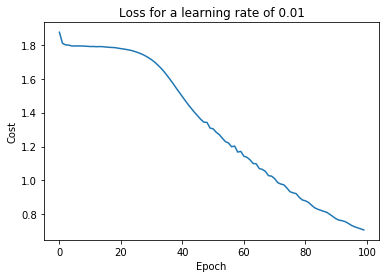

Training accuracy is  0.7537037
Test accuracy is  0.625


In [10]:
costs=[]


init=tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(100):
        
        _ , tempcost = sess.run(fetches=[optimizer, cost], feed_dict={X: train_set_x, Y: train_set_y})
        
        costs.append(tempcost)
        

    plt.plot(np.squeeze(costs))
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.title("Loss for a learning rate of 0.01")
    plt.show()

    predict_op = tf.argmax(Y_hat, 1)

    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    train_accuracy=accuracy.eval({X: train_set_x, Y: train_set_y})

    test_accuracy=accuracy.eval({X: test_set_x, Y: test_set_y})

    print("Training accuracy is ", train_accuracy)

    print("Test accuracy is ", test_accuracy)